In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize

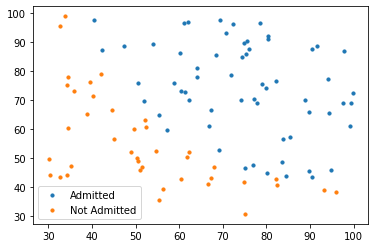

In [2]:
data = pd.read_csv('ex2data1.txt', header=None)

X = data.iloc[:, : -1]
y = data.iloc[:, -1]

admitted = data.loc[y==1]
not_admitted = data.loc[y==0]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [3]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [4]:
print(X.shape, y.shape, theta.shape)

(100, 3) (100, 1) (3, 1)


In [5]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

In [6]:
def cost_function(theta, x, y):
    m=len(y)
    hypothesis= sigmoid(np.dot(x,theta))
    error= (np.multiply(-y,np.log(hypothesis)) - np.multiply((1-y),np.log(1-hypothesis)))
    return 1/m * np.sum(error)

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(x@theta) - y)

def gradient_descent(x, y, theta, lr, iters):
    J_his = []

    for i in range(iters):
        cost_his = cost_function(theta, x, y)
        J_his.append(cost_his)
        theta = theta - (lr * gradient(theta, x, y))
    
    return theta, J_his

In [7]:
cost1 = cost_function(theta, X, y)
cost1

0.6931471805599453

In [8]:
theta_new, cost_histo = gradient_descent(X, y, theta, 0.001, 1000000)

In [14]:
theta_new

array([[-15.39517866],
       [  0.12825989],
       [  0.12247929]])

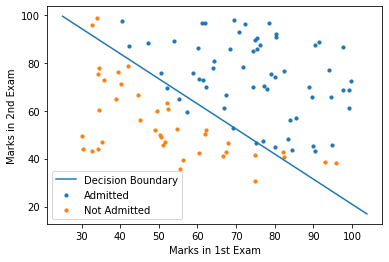

In [11]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (theta_new[0] + theta_new[1]*x_values) / theta_new[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

### Cách 2: Dùng fmin_bfgs() của scipy.optimize

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def computeCost(theta, x, y):
    z = x @ theta
    h = sigmoid(z)
    J = (1 / y.size) * sum(-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))
    return J

def gradient(theta, x, y):
    z = x @ theta
    h = sigmoid(z)
    grad = (1 / y.size) * np.dot(x.T, sigmoid(X@theta) - y)

    return grad

In [19]:
init_theta = np.zeros((X.shape[1], 1))

In [29]:
cost = computeCost(init_theta, X, y)
print(X.shape, y.shape, theta.shape)

(100, 3) (100, 1) (3, 1)


In [28]:
myarg = (X, y)
theta = scipy.optimize.fmin_bfgs(computeCost, x0=init_theta, fprime=gradient, args=myarg, maxiter=400)
theta

ValueError: shapes (3,100) and (3,100) not aligned: 100 (dim 1) != 3 (dim 0)